<a href="https://colab.research.google.com/github/shruti-0912/shruti-0912/blob/main/Dva_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


Data upload

In [ ]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


check the missing values

In [ ]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Drop rows with missing values

In [ ]:
df=df.dropna()

Impute missing values

In [ ]:
df['Year'] = df['Year'].fillna(df['Year'].mean())

In [ ]:
df.duplicated().sum()

0

check for duplicates

In [ ]:
df = df.drop_duplicates()

chcek data Types

In [ ]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Convert data Types

In [ ]:
df['Year'] = df['Year'].astype('int64')

In [ ]:
df['Global_Sales']=df['Global_Sales'].astype('float64')

Normalize data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = scaler.fit_transform(df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])

Encode categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['NA_Sales'] = encoder.fit_transform(df['NA_Sales'])
df['EU_Sales'] = encoder.fit_transform(df['EU_Sales'])
df['JP_Sales'] = encoder.fit_transform(df['JP_Sales'])
df['Other_Sales'] = encoder.fit_transform(df['Other_Sales'])
df['Publisher'] = encoder.fit_transform(df['Publisher'])
df['Global_Sales']=encoder.fit_transform(df['Global_Sales'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          16291 non-null  int64 
 1   Name          16291 non-null  object
 2   Platform      16291 non-null  object
 3   Year          16291 non-null  int64 
 4   Genre         16291 non-null  object
 5   Publisher     16291 non-null  int64 
 6   NA_Sales      16291 non-null  int64 
 7   EU_Sales      16291 non-null  int64 
 8   JP_Sales      16291 non-null  int64 
 9   Other_Sales   16291 non-null  int64 
 10  Global_Sales  16291 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.5+ MB


In [ ]:
X=df[['EU_Sales']]
Y=df[['JP_Sales']]

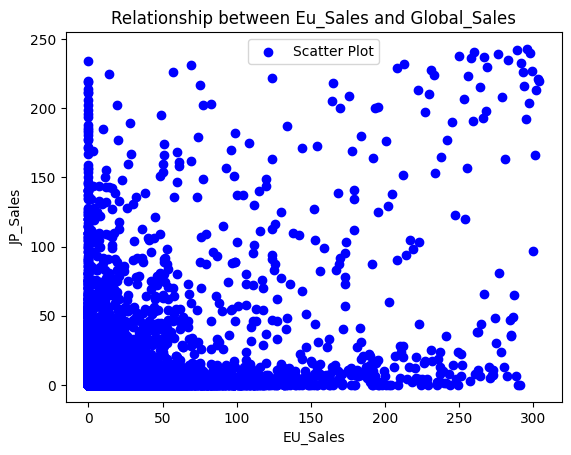

In [ ]:
plt.scatter(X, Y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Eu_Sales and Global_Sales')
plt.xlabel('EU_Sales')
plt.ylabel('JP_Sales')
plt.legend()
plt.show()


In [ ]:
print(X.shape)
print(Y.shape)

(16291, 1)
(16291, 1)


In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
#Reshaping x and y
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
#reshaping
print(X.shape)
print(Y.shape)

(16291, 1)
(16291, 1)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [ ]:
# Print the dimensions of X_train,X_test,y_train,y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(11403, 1)
(11403, 1)
(4888, 1)
(4888, 1)


In [ ]:
# Fit the linear model
# Instantiate the linear regression object lm
lm=LinearRegression()
lm.fit(X_train,Y_train)
Y_pred=lm.predict(X_test)

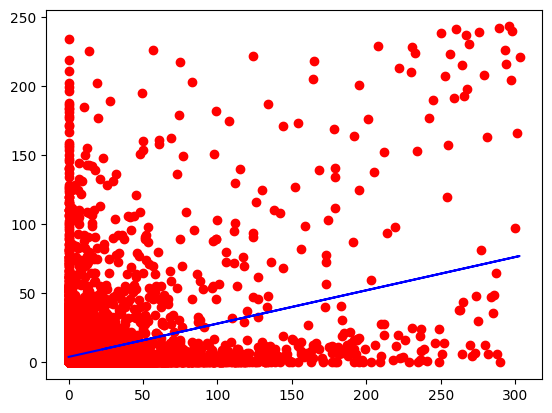

In [ ]:
#Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lm.predict(X_train), color = 'blue')

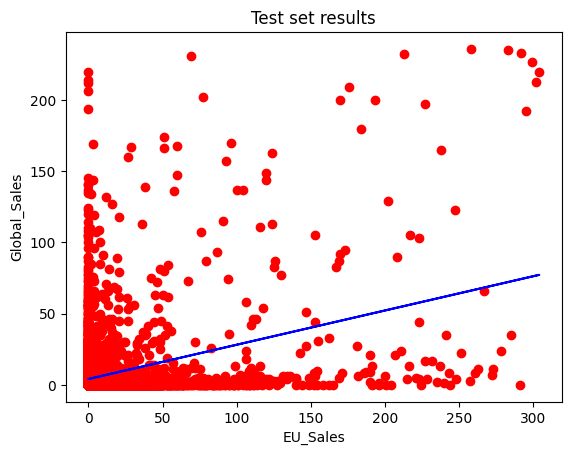

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, lm.predict(X_test), color = 'blue')
plt.title('Test set results')
plt.xlabel('EU_Sales')
plt.ylabel('Global_Sales')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)

train_mae = mean_absolute_error(Y_train, Y_pred_train)
test_mae = mean_absolute_error(Y_test, Y_pred_test)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train MAE: 10.307132087391047
Test MAE: 10.261287409822302


In [ ]:
# Compute model slope and intercept

slope = lm.coef_
intercept = lm.intercept_,
print("Estimated model slope:" , slope)
print("Estimated model intercept:" , intercept)

Estimated model slope: [[0.24072548]]
Estimated model intercept: (array([4.04664512]),)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=df.pivot_table(values="Rank", index="Platform", columns="Genre"), cmap="coolwarm")

# Add title and labels
plt.title("Global and EU Sales Heatmap", fontsize=16)
plt.xlabel("EU_Sales", fontsize=14)
plt.ylabel("Global_Sales", fontsize=14)

# Show the heatmap
plt.show()

NameError: name 'df' is not defined

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'vgsales')

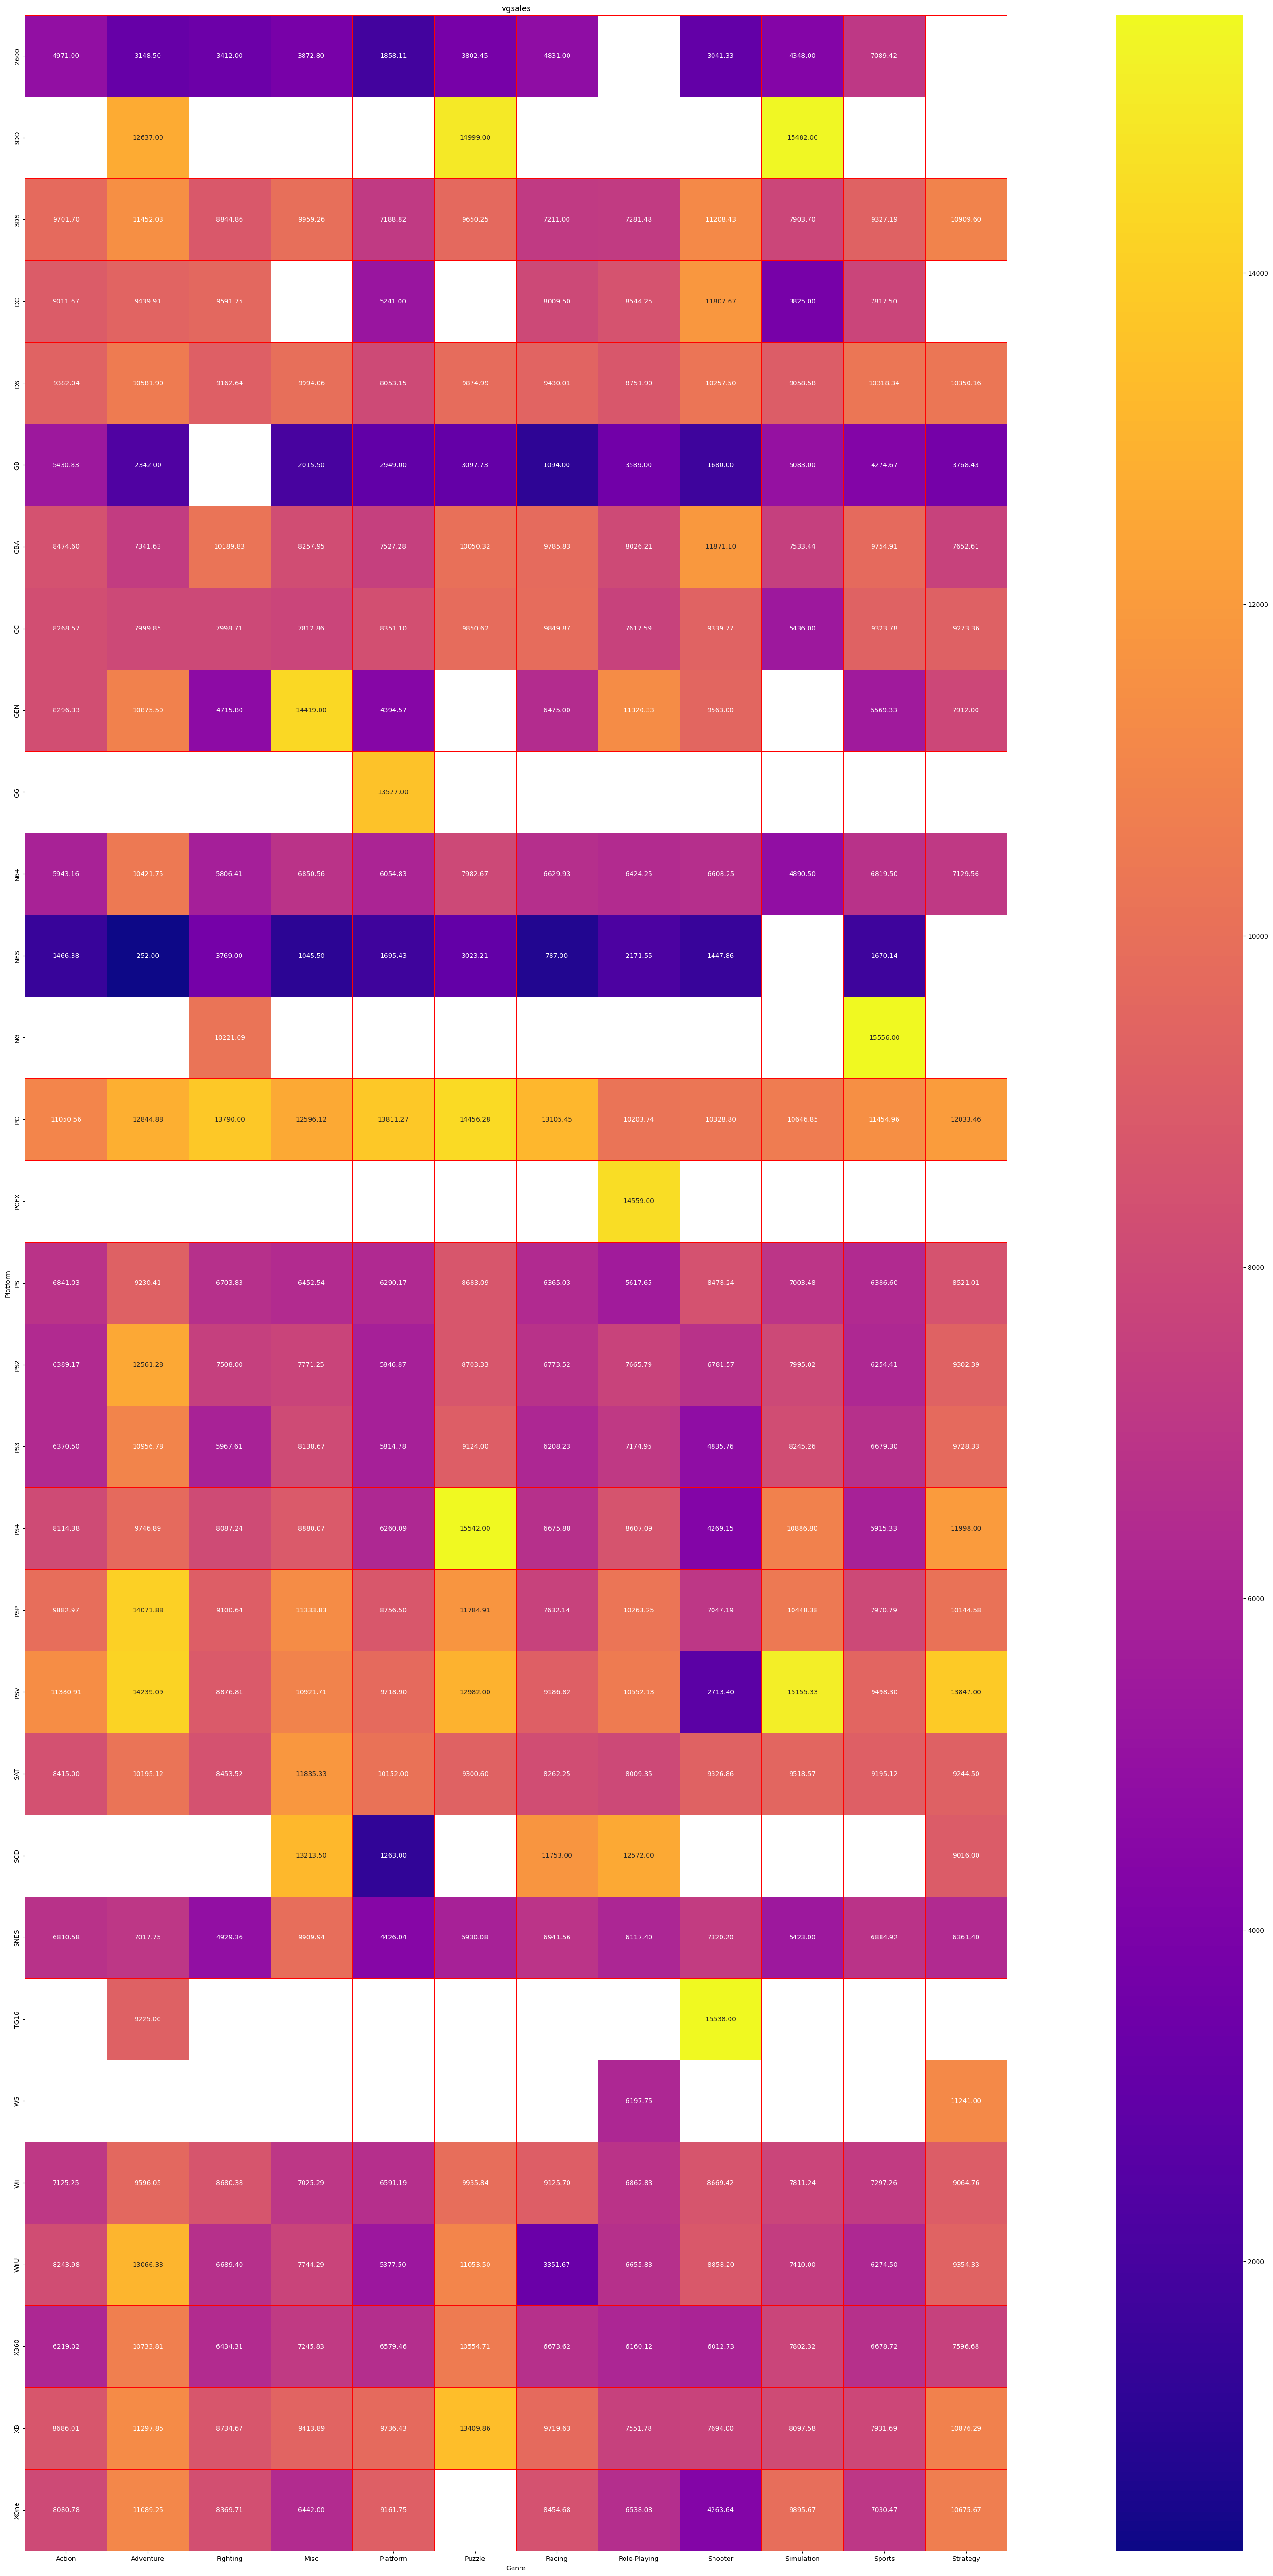

In [ ]:
fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(60,70))
df1 = pd.pivot_table(values ='Rank', index ='Platform', columns ='Genre', data = df)
dfc1 = df1.corr()
sns.heatmap(df1,cmap='plasma' , linecolor ='r', linewidths = 0.5, annot=True,square=True,fmt=".2f").set_title('vgsales')